In [1]:
from google.colab import drive
import os
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Wait until Google Drive is mounted
while not os.path.exists('/content/drive/My Drive/'):
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Drive folder to save the file
folder_path = '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/salsa.debian.org/'

# Create the folder if it doesn't exist
#os.makedirs(folder_path, exist_ok=True)

In [4]:
def categorize_commits(commit_history):

    # Initialize variables to store contributions
    contributions = defaultdict(lambda: defaultdict(int))

    # Keywords for categorizing commit messages
    keyword_categories = {
        "Bug Fix": ["bug", "fix", "issue", "resolve"],
        "Feature Addition": ["feature", "add", "new"],
        "Documentation Update": ["documentation", "doc"],
        "Code Refactoring": ["refactor", "reformat"],
        "Dependency Update": ["dependency", "update"],
        "Performance Improvement": ["optimize", "performance"],
        "Testing": ["test", "unittest"],
        "Code Cleanup": ["cleanup", "remove", "redundant"],
        "Security Fix": ["security", "vulnerability"]
    }

    # Iterate over commit history
    for index, row in commit_history.iterrows():
        author = row['author']
        message = row['message']
        email = row['email']


        # Check message for each keyword category
        for category, keywords in keyword_categories.items():
            for keyword in keywords:
                if keyword in message.lower():
                    contributions[(author, email)][category] += 1
                    break  # Move to the next category if keyword is found

    # Convert dictionary to DataFrame
    df = pd.DataFrame(contributions)

    #transpose the matrix to use the set the categories as columns
    df = df.transpose()

    #fill all NaN cells with zero
    df.fillna(0, inplace=True)

    # Reset the index to convert MultiIndex levels to regular columns
    df.reset_index(inplace=True)
    # Rename the first column
    author_column_name = 'Author'
    email_column_name = 'Email'
    df = df.rename(columns={df.columns[0]: author_column_name})
    df = df.rename(columns={df.columns[1]: email_column_name})

    return df

In [5]:
# Function to extract company name and count parts from email address
def extract_company(email):
    match = re.search(r'@([^@]+)\.', email)  # Match text after @ and before .
    if match:
        domain = match.group(1)  # Get the domain (all after the @)
        parts = domain.split('.')
        if len(parts) == 2:
            # Find the part with the longest character count excluding certain values
            longest_part = max((part for part in parts if part not in {"infa", "students", "users", "access", "spring", "kernel", "bucket", "hpl", "rowland", "linux"}), key=len)
            company = longest_part
        elif len(parts) == 3:
            company = parts[-3]
        elif len(parts) == 4:
            company = parts[-4]
        elif len(parts) == 5:
            company = parts[-5]
        elif len(parts) == 6:
            company = parts[-6]
        elif len(parts) == 7:
            company = parts[-7]
        else:
            company = domain  # If there's only one word after the @ symbol, consider it as the company
        return company.upper()
    return None

In [6]:
def find_debian_subdomain(df):
    # Define a regular expression pattern to match text after @ that contains 'debian'
    pattern = r'@([^@\s]*debian[^@\s]*)'

    # Extract the text matching the pattern from the 'From' column
    matches = df['Email'].str.extract(pattern, expand=False)

    # Filter out NaN values and get unique values
    unique_debian_subdomains = matches.dropna().unique()

    # Loop through each unique debian subdomain
    for subdomain in unique_debian_subdomains:
        # Escape special characters in the subdomain
        subdomain_escaped = re.escape(subdomain)

        # Filter rows where 'From' contains the subdomain
        filtered_rows = df[df['Email'].str.contains(subdomain_escaped, case=False, na=False)]

        # Replace 'Company' values with 'Debian' for the filtered rows
        df.loc[filtered_rows.index, 'Company'] = 'Debian Official Contr.'

    #print(unique_debian_subdomains)

    # Display the unique text
    return unique_debian_subdomains

In [7]:
def find_ubuntu_subdomain(df):
    # Define a regular expression pattern to match text after @ that contains 'debian'
    pattern = r'@([^@\s]*ubuntu[^@\s]*)'

    # Extract the text matching the pattern from the 'From' column
    matches = df['Email'].str.extract(pattern, expand=False)

    # Filter out NaN values and get unique values
    unique_debian_subdomains = matches.dropna().unique()

    # Loop through each unique debian subdomain
    for subdomain in unique_debian_subdomains:
        # Escape special characters in the subdomain
        subdomain_escaped = re.escape(subdomain)

        # Filter rows where 'From' contains the subdomain
        filtered_rows = df[df['Email'].str.contains(subdomain_escaped, case=False, na=False)]

        # Replace 'Company' values with 'Debian' for the filtered rows
        df.loc[filtered_rows.index, 'Company'] = 'Ubuntu Official Contr.'

    #print(unique_debian_subdomains)

    # Display the unique text
    return unique_debian_subdomains

# DPKG

In [8]:
# Define the path to the CSV file for dpkg repository
dpkg_csv = folder_path + "data/dpkg.csv"

# Read commit history from the CSV file
dpkg_df = pd.read_csv(dpkg_csv)

In [9]:
# Convert timestamp column to datetime format
dpkg_df['timestamp'] = pd.to_datetime(dpkg_df['timestamp'], utc=True)

# Filter the dataframe to keep only records between 2003 and 2023
dpkg_df = dpkg_df[(dpkg_df['timestamp'].dt.year >= 2003) & (dpkg_df['timestamp'].dt.year <= 2023)]

In [10]:
dpkg_df.head()

,commit_id,author,email,timestamp,message,repository,repository_size,commits_count
21,4921ef18c65b429e65b4131f198b2c68795cb819,Guillem Jover,guillem@debian.org,2023-11-21 21:38:36+00:00,build: Add missing space before backslash\n,dpkg,139919638,12480
68,f241d067a5b9ccba6fc947eb2127de1c37f5c485,Guillem Jover,guillem@debian.org,2022-12-28 00:10:57+00:00,dpkg-mergechangelogs: Refactor merge_tail() su...,dpkg,139919638,12480
69,6419e5f30baa1efb432ac918f316e38ef360fb07,Guillem Jover,guillem@debian.org,2023-01-01 03:25:46+00:00,perl: Fold if into previous else\n\nThis simpl...,dpkg,139919638,12480
70,96ae2e533e8ebdc23ca6a4078057a34d1700b971,Guillem Jover,guillem@debian.org,2023-01-01 03:11:17+00:00,"lib, src: Fold if with last previous else\n\nT...",dpkg,139919638,12480
71,17abf9229e6edf4e71fd3496238bff8be992cd1f,Guillem Jover,guillem@debian.org,2022-01-06 21:38:33+00:00,libdpkg: Deindent an else clause\n,dpkg,139919638,12480


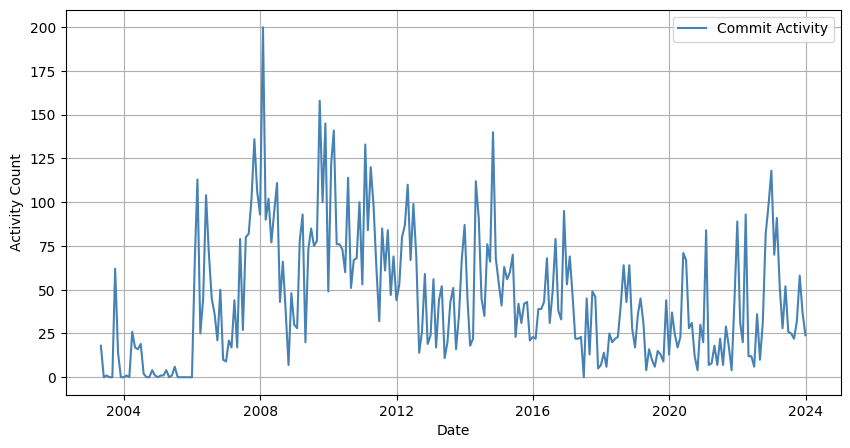

In [11]:
dpkg_df_commits = dpkg_df

# Convert timestamp column to datetime format
dpkg_df_commits['timestamp'] = pd.to_datetime(dpkg_df_commits['timestamp'], utc=True)

# Set the timestamp column as the index
dpkg_df_commits.set_index('timestamp', inplace=True)

activity_by_day = dpkg_df_commits.resample('M').agg({'commit_id': 'count'})

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(activity_by_day.index, activity_by_day['commit_id'], label='Commit Activity', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Activity Count')
#plt.title('Commit Activity Over Time')
plt.legend()
plt.grid(True)
plt.show()

#### CATEGORIZING COMMIT MESSAGES

In [12]:
# Analyze commit history
contributions = categorize_commits(dpkg_df)

In [13]:
contributions.head()

,Author,Email,Feature Addition,Code Refactoring,Bug Fix,Code Cleanup,Testing,Dependency Update,Documentation Update,Security Fix,Performance Improvement
0,Guillem Jover,guillem@debian.org,1932.0,270.0,1172.0,717.0,677.0,377.0,351.0,30.0,37.0
1,Frans Spiesschaert,Frans.Spiesschaert@yucom.be,2.0,0.0,0.0,2.0,0.0,26.0,0.0,0.0,0.0
2,Helge Kreutzmann,debian@helgefjell.de,24.0,0.0,85.0,7.0,0.0,475.0,0.0,0.0,0.0
3,Sven Joachim,svenjoac@gmx.de,13.0,0.0,30.0,3.0,3.0,125.0,2.0,0.0,0.0
4,Peter Krefting,peter@softwolves.pp.se,1.0,0.0,3.0,2.0,0.0,6.0,0.0,0.0,0.0


In [14]:
# Apply the function to extract company names and create a new 'Company' column
contributions['Company'] = contributions['Email'].apply(lambda x: extract_company(x))
# Insert the 'Company' column as the third column
contributions.insert(2, 'Company', contributions.pop('Company'))

In [15]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
contributions['Company'] = contributions['Company'].replace(['GMAIL', 'OUTLOOK', 'YAHOO', 'MAIL', 'LIVE'], 'Individual Contributor')

In [16]:
find_debian_subdomain(contributions)

array(['debian.org', 'debianpt.org', 'debian.cz', 'debian.or.jp',
       'debian.org.tw', 'eeepc.debian', 'debian.at',
       'users.alioth.debian.org'], dtype=object)

In [17]:
find_ubuntu_subdomain(contributions)

array(['ubuntu.com'], dtype=object)

In [18]:
contributions.head(10)

,Author,Email,Company,Feature Addition,Code Refactoring,Bug Fix,Code Cleanup,Testing,Dependency Update,Documentation Update,Security Fix,Performance Improvement
0,Guillem Jover,guillem@debian.org,Debian Official Contr.,1932.0,270.0,1172.0,717.0,677.0,377.0,351.0,30.0,37.0
1,Frans Spiesschaert,Frans.Spiesschaert@yucom.be,YUCOM,2.0,0.0,0.0,2.0,0.0,26.0,0.0,0.0,0.0
2,Helge Kreutzmann,debian@helgefjell.de,HELGEFJELL,24.0,0.0,85.0,7.0,0.0,475.0,0.0,0.0,0.0
3,Sven Joachim,svenjoac@gmx.de,GMX,13.0,0.0,30.0,3.0,3.0,125.0,2.0,0.0,0.0
4,Peter Krefting,peter@softwolves.pp.se,SOFTWOLVES,1.0,0.0,3.0,2.0,0.0,6.0,0.0,0.0,0.0
5,Remus-Gabriel Chelu,remusgabriel.chelu@disroot.org,DISROOT,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0
6,Américo Monteiro,a_monteiro@gmx.com,GMX,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
7,Paul Wise,pabs@debian.org,Debian Official Contr.,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Simon Richter,sjr@debian.org,Debian Official Contr.,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Sébastien Poher,sebastien@volted.net,VOLTED,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0


In [19]:
# Drop the 'Author' and 'Email' columns
contributions.drop(columns=['Author', 'Email'], inplace=True)

In [20]:
# Group by the 'Company' column and calculate the sum for each category
contributions = contributions.groupby('Company').sum()

In [21]:
# Reset the index to convert MultiIndex levels to regular columns
contributions.reset_index(inplace=True)

In [22]:
# Display the total contributions for each company
contributions.head(5)

,Company,Feature Addition,Code Refactoring,Bug Fix,Code Cleanup,Testing,Dependency Update,Documentation Update,Security Fix,Performance Improvement
0,0C3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,321,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,43-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A-ESKWADRAAT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,APACHE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Find the indices of rows where the company name starts with a number
remove_company = contributions[contributions['Company'].str[0].str.isdigit()].index
remove_company

Index([0, 1, 2], dtype='int64')

In [24]:
# Drop the rows using the indices
contributions.drop(remove_company, inplace=True)

# Display the DataFrame after removing the rows
contributions

,Company,Feature Addition,Code Refactoring,Bug Fix,Code Cleanup,Testing,Dependency Update,Documentation Update,Security Fix,Performance Improvement
3,A-ESKWADRAAT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,APACHE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,AUREL32,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,BEOBIDE,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
7,BLUEARC,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
108,WEB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109,WOOKWARE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,XCERION,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
111,YUCOM,2.0,0.0,0.0,2.0,0.0,26.0,0.0,0.0,0.0


<ipython-input-25-0ff44c5d3ffc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=contributions, ci=None, color='steelblue')


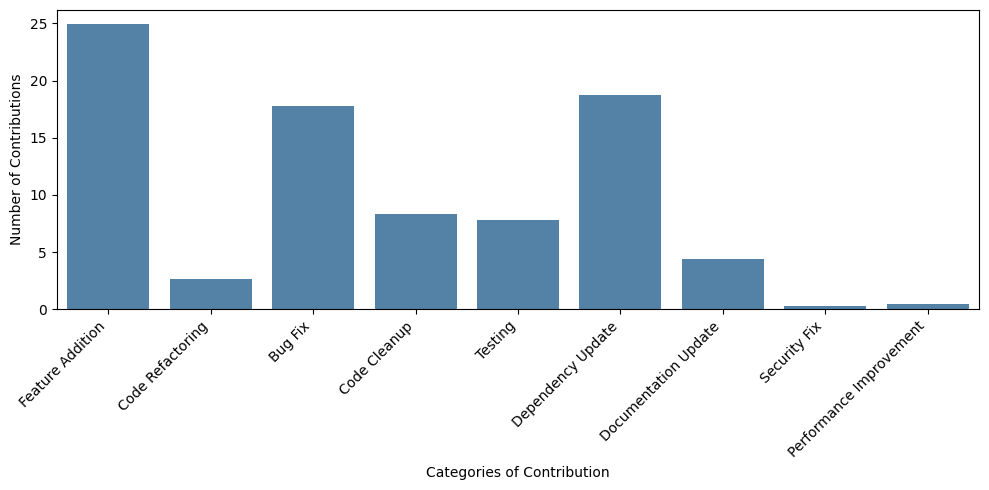

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(10, 5))
sns.barplot(data=contributions, ci=None, color='steelblue')

# Add labels and title
plt.xlabel('Categories of Contribution')
plt.ylabel('Number of Contributions')
#plt.title('Contributions by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [26]:
# Sum contributions across all categories for each company
contributions['Total_Contributions'] = contributions.iloc[:, 1:].sum(axis=1)

# Sort the companies based on their total contributions
top_10_companies = contributions.sort_values(by='Total_Contributions', ascending=False).head(10)

# Check if 'Ubuntu' and 'Canonical' are present in the top 10 companies
if 'Ubuntu' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Ubuntu'
    top_10_companies.at[idx, 'Company'] = 'Ubuntu'

if 'Canonical' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Canonical'
    top_10_companies.at[idx, 'Company'] = 'Canonical'

# Display the top 10 companies
top_10_companies[['Company', 'Total_Contributions']]


,Company,Total_Contributions
26,Debian Official Contr.,8001.0
41,HELGEFJELL,591.0
36,GMX,184.0
44,Individual Contributor,164.0
103,Ubuntu Official Contr.,37.0
66,NETSPLIT,31.0
111,YUCOM,30.0
88,SOFTWOLVES,30.0
49,KITENET,22.0
104,Canonical,19.0


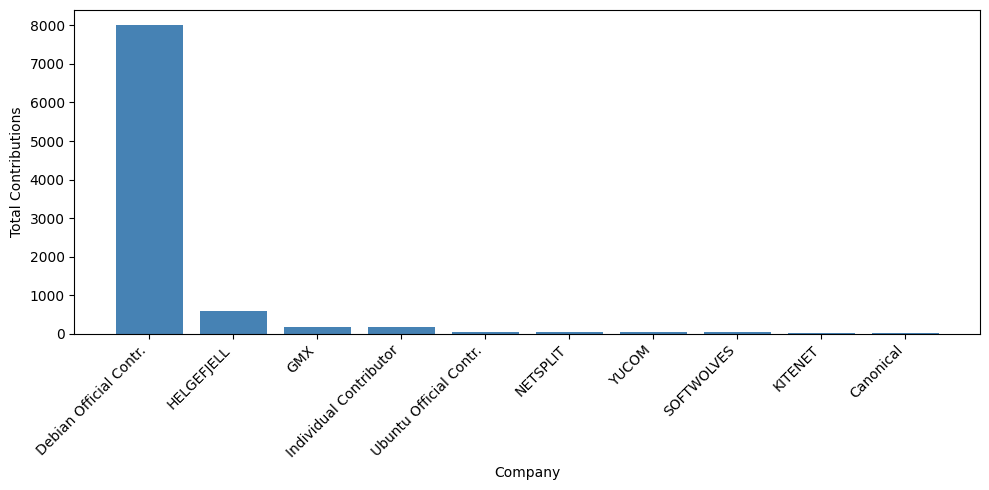

In [27]:
import matplotlib.pyplot as plt

# Plotting the top 10 companies with their total contributions
plt.figure(figsize=(10, 5))
plt.bar(top_10_companies['Company'], top_10_companies['Total_Contributions'], color='steelblue')
plt.xlabel('Company')
plt.ylabel('Total Contributions')
#plt.title('Top 10 Companies by # of Contributions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# GLIBC

In [28]:
# Define the path to the CSV file for glibc repository
glibc_csv = folder_path + "data/glibc.csv"

# Read commit history from the CSV file
glibc_df = pd.read_csv(glibc_csv)

In [29]:
# Convert timestamp column to datetime format
glibc_df['timestamp'] = pd.to_datetime(glibc_df['timestamp'], utc=True)

# Filter the dataframe to keep only records between 2003 and 2023
glibc_df = glibc_df[(glibc_df['timestamp'].dt.year >= 2003) & (glibc_df['timestamp'].dt.year <= 2023)]

In [30]:
glibc_df.head()

,commit_id,author,email,timestamp,message,repository,repository_size,commits_count
26,00ae405d36a2537f61285be1718d61aaa16cd675,Aurelien Jarno,aurelien@aurel32.net,2023-12-03 13:23:58+00:00,releasing package glibc version 2.37-13\n,glibc,27341583,6237
27,236d810d16c1b5198928b35880bcd8d572f640ff,Aurelien Jarno,aurelien@aurel32.net,2023-12-03 13:19:54+00:00,debian/local/manpages/getconf.1: fix issues re...,glibc,27341583,6237
28,2c456c859adb5d34d8cfd79e2473ad9cc0df33cf,Aurelien Jarno,aurelien@aurel32.net,2023-12-03 13:00:32+00:00,"Update Swedish debconf translation, by Martin ...",glibc,27341583,6237
29,d21e6ac6014dfc290f2634ebea6a3799dcca3358,Aurelien Jarno,aurelien@aurel32.net,2023-12-03 11:50:15+00:00,debian/patches/any/local-tcsetaddr.diff: fix a...,glibc,27341583,6237
30,74d299ffa978b62fb63d86429f2446a53c486528,Aurelien Jarno,aurelien@aurel32.net,2023-12-03 11:23:56+00:00,debian/patches/git-updates.diff: update from u...,glibc,27341583,6237


<ipython-input-31-828c84519fa7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glibc_df_commits['timestamp'] = pd.to_datetime(glibc_df_commits['timestamp'], utc=True)


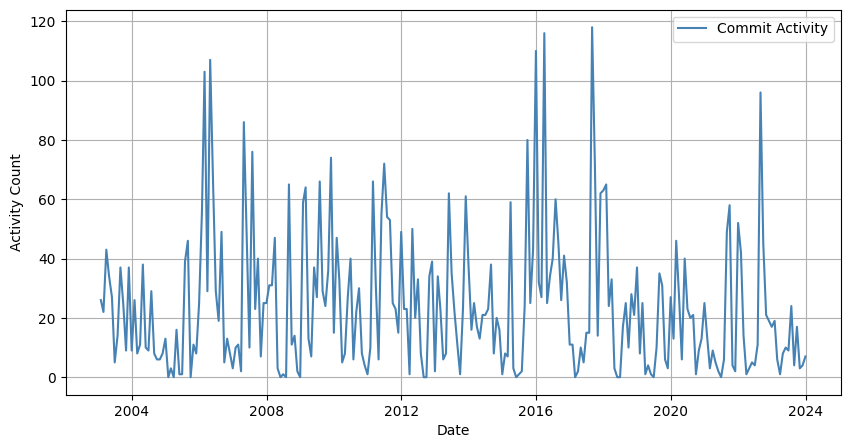

In [31]:
glibc_df_commits = glibc_df

# Convert timestamp column to datetime format
glibc_df_commits['timestamp'] = pd.to_datetime(glibc_df_commits['timestamp'], utc=True)

# Set the timestamp column as the index
glibc_df_commits.set_index('timestamp', inplace=True)

activity_by_day = glibc_df_commits.resample('M').agg({'commit_id': 'count'})

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(activity_by_day.index, activity_by_day['commit_id'], label='Commit Activity', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Activity Count')
#plt.title('Commit Activity Over Time')
plt.legend()
plt.grid(True)
plt.show()

#### CATEGORIZING COMMIT MESSAGES

In [32]:
# Analyze commit history
contributions = categorize_commits(glibc_df)

In [33]:
contributions.head()

,Author,Email,Bug Fix,Documentation Update,Dependency Update,Feature Addition,Code Cleanup,Testing,Performance Improvement,Security Fix,Code Refactoring
0,Aurelien Jarno,aurelien@aurel32.net,325.0,5.0,314.0,269.0,79.0,161.0,13.0,6.0,0.0
1,Samuel Thibault,samuel.thibault@ens-lyon.org,255.0,2.0,170.0,154.0,26.0,145.0,3.0,0.0,1.0
2,Helmut Grohne,helmut@subdivi.de,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
3,Andrej Shadura,andrewsh@debian.org,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Luca Boccassi,bluca@debian.org,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [34]:
# Apply the function to extract company names and create a new 'Company' column
contributions['Company'] = contributions['Email'].apply(lambda x: extract_company(x))
# Insert the 'Company' column as the third column
contributions.insert(2, 'Company', contributions.pop('Company'))

In [35]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
contributions['Company'] = contributions['Company'].replace(['GMAIL', 'OUTLOOK', 'YAHOO', 'MAIL', 'LIVE'], 'Individual Contributor')

In [36]:
find_debian_subdomain(contributions)

array(['debian.org'], dtype=object)

In [37]:
find_ubuntu_subdomain(contributions)

array([], dtype=object)

In [38]:
contributions.head(10)

,Author,Email,Company,Bug Fix,Documentation Update,Dependency Update,Feature Addition,Code Cleanup,Testing,Performance Improvement,Security Fix,Code Refactoring
0,Aurelien Jarno,aurelien@aurel32.net,AUREL32,325.0,5.0,314.0,269.0,79.0,161.0,13.0,6.0,0.0
1,Samuel Thibault,samuel.thibault@ens-lyon.org,ENS-LYON,255.0,2.0,170.0,154.0,26.0,145.0,3.0,0.0,1.0
2,Helmut Grohne,helmut@subdivi.de,SUBDIVI,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
3,Andrej Shadura,andrewsh@debian.org,Debian Official Contr.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Luca Boccassi,bluca@debian.org,Debian Official Contr.,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
5,наб,nabijaczleweli@nabijaczleweli.xyz,NABIJACZLEWELI,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
6,Aurelien Jarno,aurel32@debian.org,Debian Official Contr.,684.0,22.0,336.0,644.0,195.0,190.0,17.0,3.0,0.0
7,Gunnar Hjalmarsson,gunnarhj@debian.org,Debian Official Contr.,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Simon McVittie,smcv@debian.org,Debian Official Contr.,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,Stephen Kitt,skitt@debian.org,Debian Official Contr.,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Drop the 'Author' and 'Email' columns
contributions.drop(columns=['Author', 'Email'], inplace=True)

In [40]:
# Group by the 'Company' column and calculate the sum for each category
contributions = contributions.groupby('Company').sum()

In [41]:
# Reset the index to convert MultiIndex levels to regular columns
contributions.reset_index(inplace=True)

In [42]:
# Display the total contributions for each company
contributions.head(5)

,Company,Bug Fix,Documentation Update,Dependency Update,Feature Addition,Code Cleanup,Testing,Performance Improvement,Security Fix,Code Refactoring
0,0C3,76.0,1.0,21.0,75.0,21.0,44.0,4.0,1.0,0.0
1,AUREL32,325.0,5.0,314.0,269.0,79.0,161.0,13.0,6.0,0.0
2,Debian Official Contr.,1136.0,46.0,553.0,1162.0,320.0,243.0,25.0,3.0,0.0
3,ENS-LYON,255.0,2.0,170.0,154.0,26.0,145.0,3.0,0.0,1.0
4,Individual Contributor,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Find the indices of rows where the company name starts with a number
remove_company = contributions[contributions['Company'].str[0].str.isdigit()].index
remove_company

Index([0], dtype='int64')

In [44]:
# Drop the rows using the indices
contributions.drop(remove_company, inplace=True)

# Display the DataFrame after removing the rows
contributions

,Company,Bug Fix,Documentation Update,Dependency Update,Feature Addition,Code Cleanup,Testing,Performance Improvement,Security Fix,Code Refactoring
1,AUREL32,325.0,5.0,314.0,269.0,79.0,161.0,13.0,6.0,0.0
2,Debian Official Contr.,1136.0,46.0,553.0,1162.0,320.0,243.0,25.0,3.0,0.0
3,ENS-LYON,255.0,2.0,170.0,154.0,26.0,145.0,3.0,0.0,1.0
4,Individual Contributor,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NABIJACZLEWELI,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
6,SEZNAM,17.0,0.0,88.0,14.0,2.0,8.0,0.0,0.0,0.0
7,SUBDIVI,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0


<ipython-input-45-0ff44c5d3ffc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=contributions, ci=None, color='steelblue')


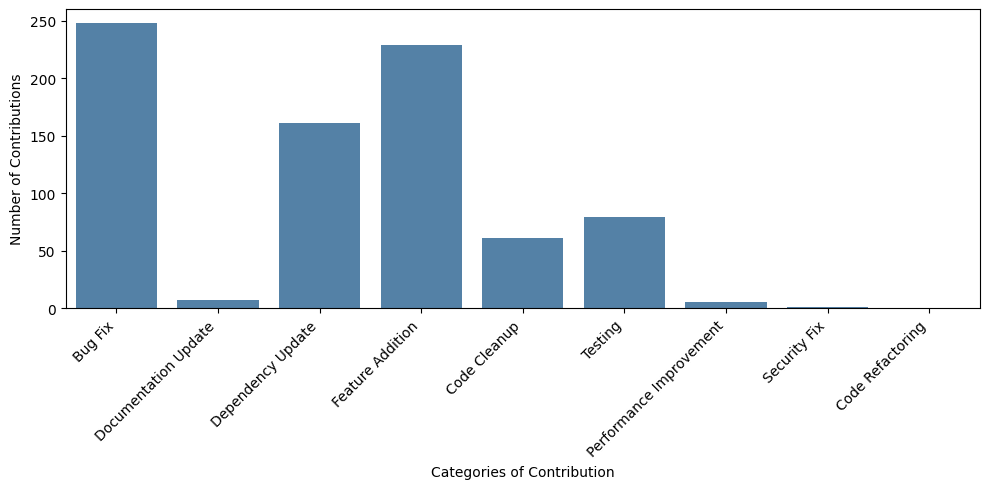

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(10, 5))
sns.barplot(data=contributions, ci=None, color='steelblue')

# Add labels and title
plt.xlabel('Categories of Contribution')
plt.ylabel('Number of Contributions')
#plt.title('Contributions by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [46]:
# Sum contributions across all categories for each company
contributions['Total_Contributions'] = contributions.iloc[:, 1:].sum(axis=1)

# Sort the companies based on their total contributions
top_10_companies = contributions.sort_values(by='Total_Contributions', ascending=False).head(10)

# Check if 'Ubuntu' and 'Canonical' are present in the top 10 companies
if 'Ubuntu' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Ubuntu'
    top_10_companies.at[idx, 'Company'] = 'Ubuntu'

if 'Canonical' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Canonical'
    top_10_companies.at[idx, 'Company'] = 'Canonical'

# Display the top 10 companies
top_10_companies[['Company', 'Total_Contributions']]

,Company,Total_Contributions
2,Debian Official Contr.,3488.0
1,AUREL32,1172.0
3,ENS-LYON,756.0
6,SEZNAM,129.0
7,SUBDIVI,7.0
4,Individual Contributor,4.0
5,Canonical,3.0


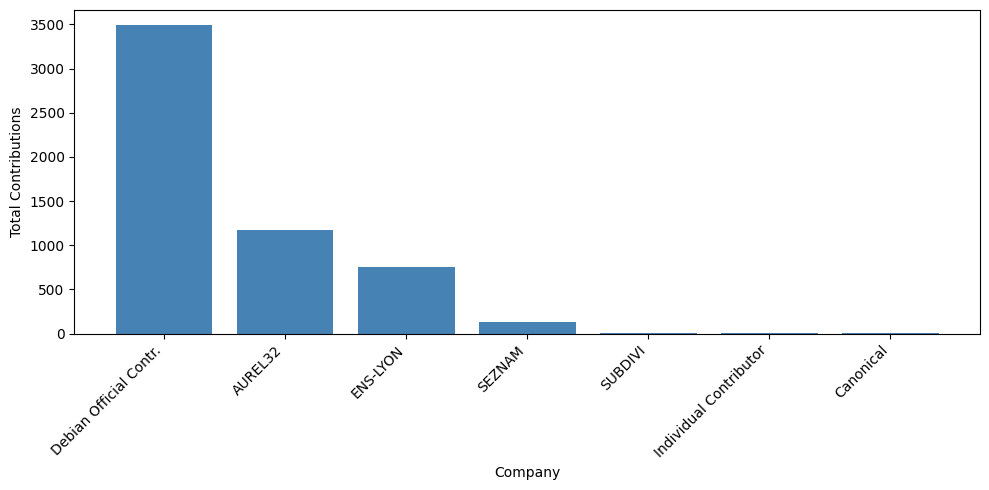

In [47]:
import matplotlib.pyplot as plt

# Plotting the top 10 companies with their total contributions
plt.figure(figsize=(10, 5))
plt.bar(top_10_companies['Company'], top_10_companies['Total_Contributions'], color='steelblue')
plt.xlabel('Company')
plt.ylabel('Total Contributions')
#plt.title('Top 10 Companies by # of Contributions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# SYSTEMD

In [48]:
# Define the path to the CSV file for systemd repository
systemd_csv = folder_path + "data/systemd.csv"

# Read commit history from the CSV file
systemd_df = pd.read_csv(systemd_csv)

In [49]:
# Convert timestamp column to datetime format
systemd_df['timestamp'] = pd.to_datetime(systemd_df['timestamp'], utc=True)

# Filter the dataframe to keep only records between 2003 and 2023
systemd_df = systemd_df[(systemd_df['timestamp'].dt.year >= 2003) & (systemd_df['timestamp'].dt.year <= 2023)]

In [50]:
systemd_df.head()

,commit_id,author,email,timestamp,message,repository,repository_size,commits_count
53,e95e400788575ae9eea847dc68ce5705a1715e1d,Luca Boccassi,bluca@debian.org,2023-11-06 21:58:50+00:00,"d/t/upstream: add dependencies on openssh, gnu...",systemd,186440057,15439
54,06e82ae55fc61a9d8d915c5df622c246f37f8757,Dan Streetman,ddstreet@canonical.com,2021-06-30 14:51:51+00:00,d/t/upstream: only save journal for failing in...,systemd,186440057,15439
55,040e07d56ff9346f2d63aeedb25783bf69c72d3f,Yu Watanabe,watanabe.yu+github@gmail.com,2023-08-13 10:34:53+00:00,d/t/upstream: skip qemu-only tests on ppc64el ...,systemd,186440057,15439
58,7d132f3235d68f832dbd48e0a1de0df5575e7888,Luca Boccassi,bluca@debian.org,2023-04-10 17:39:23+00:00,d/e/checkout-upstream: build with default-time...,systemd,186440057,15439
59,d169d2c7f99076e6f012265a03e31f27b5e77b46,Luca Boccassi,bluca@debian.org,2023-04-05 20:36:46+00:00,d/e/checkout-upstream: do not rebase when buil...,systemd,186440057,15439


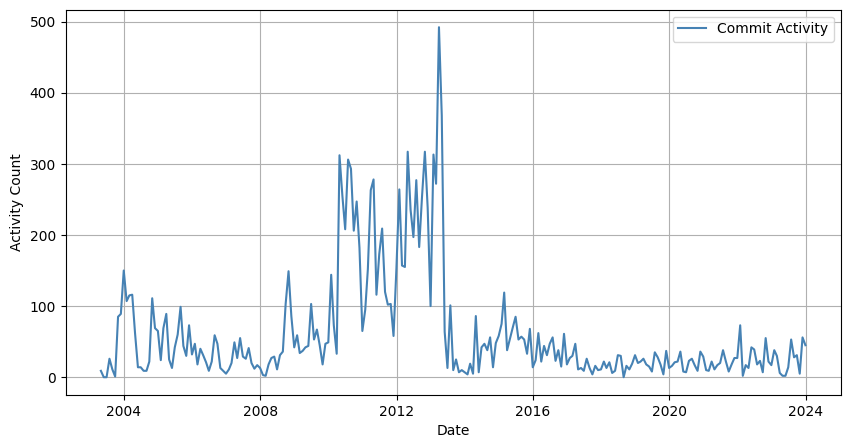

In [51]:
systemd_df_commits = systemd_df

# Convert timestamp column to datetime format
systemd_df_commits['timestamp'] = pd.to_datetime(systemd_df_commits['timestamp'], utc=True)

# Set the timestamp column as the index
systemd_df_commits.set_index('timestamp', inplace=True)

activity_by_day = systemd_df_commits.resample('M').agg({'commit_id': 'count'})

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(activity_by_day.index, activity_by_day['commit_id'], label='Commit Activity', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Activity Count')
#plt.title('Commit Activity Over Time')
plt.legend()
plt.grid(True)
plt.show()

#### CATEGORIZING COMMIT MESSAGES

In [52]:
# Analyze commit history
contributions = categorize_commits(systemd_df)

In [53]:
contributions.head()

,Author,Email,Feature Addition,Dependency Update,Bug Fix,Testing,Code Cleanup,Security Fix,Documentation Update,Code Refactoring,Performance Improvement
0,Luca Boccassi,bluca@debian.org,90.0,127.0,31.0,45.0,9.0,1.0,1.0,0.0,0.0
1,Dan Streetman,ddstreet@canonical.com,14.0,3.0,18.0,32.0,9.0,0.0,1.0,0.0,0.0
2,Yu Watanabe,watanabe.yu+github@gmail.com,1.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0
3,Michael Biebl,biebl@debian.org,349.0,247.0,285.0,89.0,120.0,7.0,22.0,1.0,0.0
4,Nick Rosbrook,enr0n@ubuntu.com,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Apply the function to extract company names and create a new 'Company' column
contributions['Company'] = contributions['Email'].apply(lambda x: extract_company(x))
# Insert the 'Company' column as the third column
contributions.insert(2, 'Company', contributions.pop('Company'))

In [55]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
contributions['Company'] = contributions['Company'].replace(['GMAIL', 'OUTLOOK', 'YAHOO', 'MAIL', 'LIVE'], 'Individual Contributor')

In [56]:
find_debian_subdomain(contributions)

array(['debian.org'], dtype=object)

In [57]:
find_ubuntu_subdomain(contributions)

array(['ubuntu.com'], dtype=object)

In [58]:
contributions.head(10)

,Author,Email,Company,Feature Addition,Dependency Update,Bug Fix,Testing,Code Cleanup,Security Fix,Documentation Update,Code Refactoring,Performance Improvement
0,Luca Boccassi,bluca@debian.org,Debian Official Contr.,90.0,127.0,31.0,45.0,9.0,1.0,1.0,0.0,0.0
1,Dan Streetman,ddstreet@canonical.com,CANONICAL,14.0,3.0,18.0,32.0,9.0,0.0,1.0,0.0,0.0
2,Yu Watanabe,watanabe.yu+github@gmail.com,Individual Contributor,1.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0
3,Michael Biebl,biebl@debian.org,Debian Official Contr.,349.0,247.0,285.0,89.0,120.0,7.0,22.0,1.0,0.0
4,Nick Rosbrook,enr0n@ubuntu.com,Ubuntu Official Contr.,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
5,Oxan van Leeuwen,oxan@oxanvanleeuwen.nl,OXANVANLEEUWEN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Matthias Geiger,werdahias@riseup.net,RISEUP,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Gioele Barabucci,gioele@svario.it,SVARIO,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Daniel Andersson,daniel.4ndersson@gmail.com,Individual Contributor,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,Helmut Grohne,helmut@subdivi.de,SUBDIVI,1.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


In [59]:
# Drop the 'Author' and 'Email' columns
contributions.drop(columns=['Author', 'Email'], inplace=True)

In [60]:
# Group by the 'Company' column and calculate the sum for each category
contributions = contributions.groupby('Company').sum()

In [61]:
# Reset the index to convert MultiIndex levels to regular columns
contributions.reset_index(inplace=True)

In [62]:
# Display the total contributions for each company
contributions.head(5)

,Company,Feature Addition,Dependency Update,Bug Fix,Testing,Code Cleanup,Security Fix,Documentation Update,Code Refactoring,Performance Improvement
0,0X01B,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ABO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACHURCH,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADISCON,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ALDEBARAN-ROBOTICS,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
# Find the indices of rows where the company name starts with a number
remove_company = contributions[contributions['Company'].str[0].str.isdigit()].index
remove_company

Index([0], dtype='int64')

In [64]:
# Drop the rows using the indices
contributions.drop(remove_company, inplace=True)

# Display the DataFrame after removing the rows
contributions

,Company,Feature Addition,Dependency Update,Bug Fix,Testing,Code Cleanup,Security Fix,Documentation Update,Code Refactoring,Performance Improvement
1,ABO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACHURCH,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADISCON,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ALDEBARAN-ROBOTICS,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
5,ALTLINUX,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
219,XS4ALL,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
220,YA,3.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
221,YOUMUSTBEJOKING,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
222,ZCU,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Find the indices of rows where the company name starts with a number
remove_company = contributions[contributions['Company'].str[0].str.isdigit()].index
remove_company

Index([], dtype='int64')

In [66]:
# Drop the rows using the indices
contributions.drop(remove_company, inplace=True)

# Display the DataFrame after removing the rows
contributions

,Company,Feature Addition,Dependency Update,Bug Fix,Testing,Code Cleanup,Security Fix,Documentation Update,Code Refactoring,Performance Improvement
1,ABO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACHURCH,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADISCON,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ALDEBARAN-ROBOTICS,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
5,ALTLINUX,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
219,XS4ALL,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
220,YA,3.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
221,YOUMUSTBEJOKING,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
222,ZCU,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-67-0ff44c5d3ffc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=contributions, ci=None, color='steelblue')


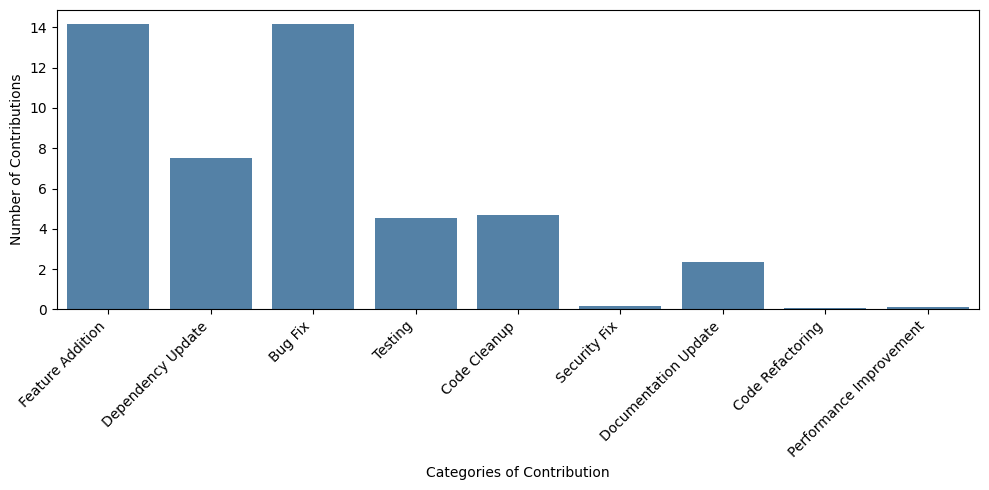

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(10, 5))
sns.barplot(data=contributions, ci=None, color='steelblue')

# Add labels and title
plt.xlabel('Categories of Contribution')
plt.ylabel('Number of Contributions')
#plt.title('Contributions by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [68]:
# Sum contributions across all categories for each company
contributions['Total_Contributions'] = contributions.iloc[:, 1:].sum(axis=1)

# Sort the companies based on their total contributions
top_10_companies = contributions.sort_values(by='Total_Contributions', ascending=False).head(10)

# Check if 'Ubuntu' and 'Canonical' are present in the top 10 companies
if 'Ubuntu' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Ubuntu'
    top_10_companies.at[idx, 'Company'] = 'Ubuntu'

if 'Canonical' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Canonical'
    top_10_companies.at[idx, 'Company'] = 'Canonical'

# Display the top 10 companies
top_10_companies[['Company', 'Total_Contributions']]

,Company,Total_Contributions
160,POETTERING,2124.0
210,VRFY,1883.0
44,Debian Official Contr.,1564.0
206,Ubuntu Official Contr.,1232.0
110,KROAH,517.0
167,REDHAT,493.0
212,WAW,447.0
193,SUSE,423.0
100,Individual Contributor,343.0
50,Canonical,146.0


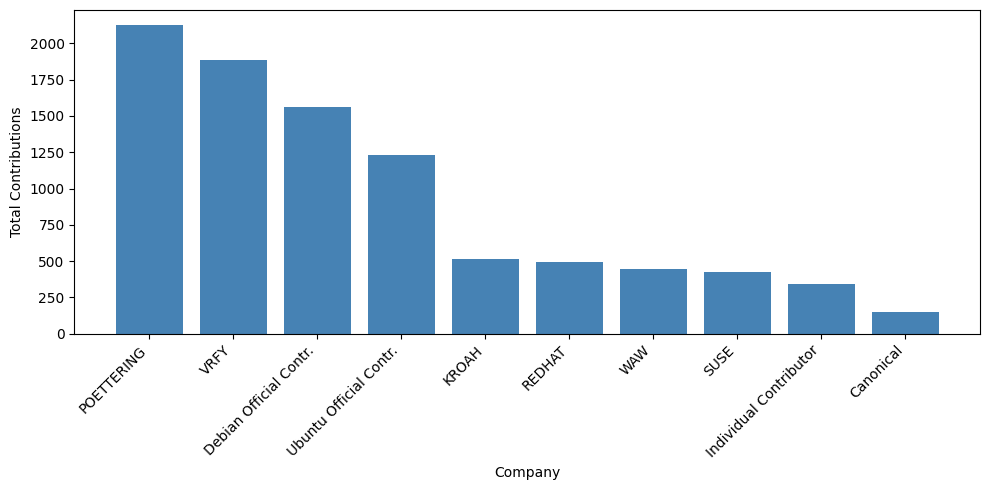

In [69]:
import matplotlib.pyplot as plt

# Plotting the top 10 companies with their total contributions
plt.figure(figsize=(10, 5))
plt.bar(top_10_companies['Company'], top_10_companies['Total_Contributions'], color='steelblue')
plt.xlabel('Company')
plt.ylabel('Total Contributions')
#plt.title('Top 10 Companies by # of Contributions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# APT

In [70]:
# Define the path to the CSV file for apt repository
apt_csv = folder_path + "data/apt.csv"

# Read commit history from the CSV file
apt_df = pd.read_csv(apt_csv)

In [71]:
# Convert timestamp column to datetime format
apt_df['timestamp'] = pd.to_datetime(apt_df['timestamp'], utc=True)

# Filter the dataframe to keep only records between 2003 and 2023
apt_df = apt_df[(apt_df['timestamp'].dt.year >= 2003) & (apt_df['timestamp'].dt.year <= 2023)]

In [72]:
apt_df.head()

,commit_id,author,email,timestamp,message,repository,repository_size,commits_count
24,690993b1b9b4a932ca5bf5374c59e4cf88f18732,Christian Blichmann,mail@blichmann.eu,2022-02-01 19:59:57+00:00,Columnar output for package lists similar to '...,apt,122469515,10412
101,8c86d5fc940f19b6908f731d334a6f3be0d027d0,Gábor Németh,homar@riseup.net,2023-12-15 11:57:54+00:00,Document 'dist-clean'\n\ncf. https://salsa.deb...,apt,122469515,10412
104,deeda8948be59730659972185e279fbe1b438121,Gábor Németh,homar@riseup.net,2023-12-15 12:12:05+00:00,Typos in integration tests\n\nCorrected 'und' ...,apt,122469515,10412
113,c476086e9336b681d365cd18ce1c96135a1ddb31,Adam Saponara,as@php.net,2023-12-27 19:56:33+00:00,Prevent infinite loop in `ReadConfigFile`\n\nB...,apt,122469515,10412
114,6c62f526ab27857406399495bca9ebfa7030a3bc,наб,nabijaczleweli@nabijaczleweli.xyz,2023-12-28 04:39:10+00:00,apt.8: summarise remaining verbs (Closes: #827...,apt,122469515,10412


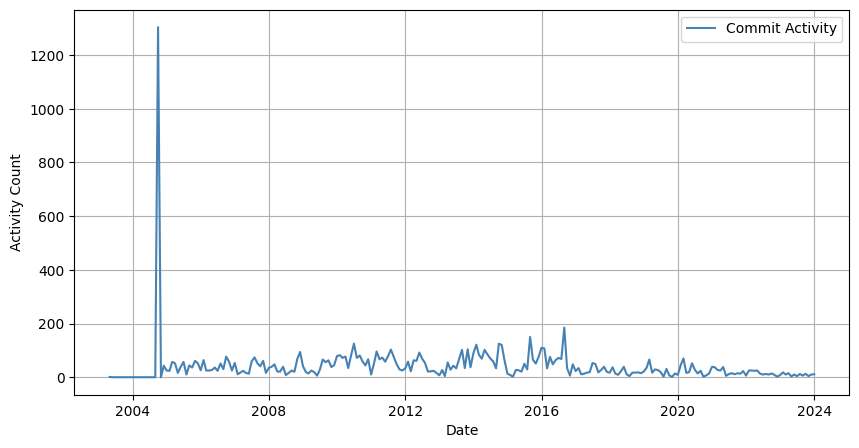

In [73]:
apt_df_commits = apt_df

# Convert timestamp column to datetime format
apt_df_commits['timestamp'] = pd.to_datetime(apt_df_commits['timestamp'], utc=True)

# Set the timestamp column as the index
apt_df_commits.set_index('timestamp', inplace=True)

activity_by_day = apt_df_commits.resample('M').agg({'commit_id': 'count'})

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(activity_by_day.index, activity_by_day['commit_id'], label='Commit Activity', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Activity Count')
#plt.title('Commit Activity Over Time')
plt.legend()
plt.grid(True)
plt.show()

#### CATEGORIZING COMMIT MESSAGES

In [74]:
# Analyze commit history
contributions = categorize_commits(apt_df)

In [75]:
contributions.head()

,Author,Email,Feature Addition,Dependency Update,Code Cleanup,Documentation Update,Testing,Bug Fix,Security Fix,Code Refactoring,Performance Improvement
0,Christian Blichmann,mail@blichmann.eu,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gábor Németh,homar@riseup.net,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
2,наб,nabijaczleweli@nabijaczleweli.xyz,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Julian Andres Klode,jak@debian.org,214.0,56.0,45.0,52.0,121.0,219.0,9.0,5.0,21.0
4,David Kalnischkies,david@kalnischkies.de,397.0,117.0,174.0,76.0,308.0,363.0,39.0,25.0,10.0


In [76]:
# Apply the function to extract company names and create a new 'Company' column
contributions['Email'] = contributions['Email'].astype(str)
contributions['Company'] = contributions['Email'].apply(lambda x: extract_company(x))
# Insert the 'Company' column as the third column
contributions.insert(2, 'Company', contributions.pop('Company'))

In [77]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
contributions['Company'] = contributions['Company'].replace(['GMAIL', 'OUTLOOK', 'YAHOO', 'MAIL', 'LIVE'], 'Individual Contributor')

In [78]:
find_debian_subdomain(contributions)

array(['debian.org', 'users.noreply.salsa.debian.org', 'debian.cz',
       'debian-devbox', 'debian.or.jp', 'users.alioth.debian.org',
       '1501-debian', 'debian-vm'], dtype=object)

In [79]:
find_ubuntu_subdomain(contributions)

array(['ubuntu.com', 'kubuntu.org'], dtype=object)

In [80]:
contributions.head(10)

,Author,Email,Company,Feature Addition,Dependency Update,Code Cleanup,Documentation Update,Testing,Bug Fix,Security Fix,Code Refactoring,Performance Improvement
0,Christian Blichmann,mail@blichmann.eu,BLICHMANN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gábor Németh,homar@riseup.net,RISEUP,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
2,наб,nabijaczleweli@nabijaczleweli.xyz,NABIJACZLEWELI,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Julian Andres Klode,jak@debian.org,Debian Official Contr.,214.0,56.0,45.0,52.0,121.0,219.0,9.0,5.0,21.0
4,David Kalnischkies,david@kalnischkies.de,KALNISCHKIES,397.0,117.0,174.0,76.0,308.0,363.0,39.0,25.0,10.0
5,Kenyon Ralph,kenyon@kenyonralph.com,KENYONRALPH,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Julian Andres Klode,julian.klode@canonical.com,CANONICAL,145.0,43.0,68.0,16.0,57.0,89.0,7.0,3.0,5.0
7,Frans Spiesschaert,Frans.Spiesschaert@yucom.be,YUCOM,1.0,42.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,Américo Monteiro,a_monteiro@gmx.com,GMX,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Helge Kreutzmann,debian@helgefjell.de,HELGEFJELL,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Drop the 'Author' and 'Email' columns
contributions.drop(columns=['Author', 'Email'], inplace=True)

In [82]:
# Group by the 'Company' column and calculate the sum for each category
contributions = contributions.groupby('Company').sum()

In [83]:
# Reset the index to convert MultiIndex levels to regular columns
contributions.reset_index(inplace=True)

In [84]:
# Display the total contributions for each company
contributions.head(5)

,Company,Feature Addition,Dependency Update,Code Cleanup,Documentation Update,Testing,Bug Fix,Security Fix,Code Refactoring,Performance Improvement
0,AKAMAI,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ALUMNI,4.0,0.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0
2,ARCOR,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ARTEQ,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,BEBT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Find the indices of rows where the company name starts with a number
remove_company = contributions[contributions['Company'].str[0].str.isdigit()].index
remove_company

Index([], dtype='int64')

In [86]:
# Drop the rows using the indices
contributions.drop(remove_company, inplace=True)

# Display the DataFrame after removing the rows
contributions

,Company,Feature Addition,Dependency Update,Code Cleanup,Documentation Update,Testing,Bug Fix,Security Fix,Code Refactoring,Performance Improvement
0,AKAMAI,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ALUMNI,4.0,0.0,2.0,1.0,0.0,6.0,0.0,0.0,0.0
2,ARCOR,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ARTEQ,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,BEBT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
94,WESTERHU,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
95,YA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,YANDEX,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,YATH,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<ipython-input-87-0ff44c5d3ffc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=contributions, ci=None, color='steelblue')


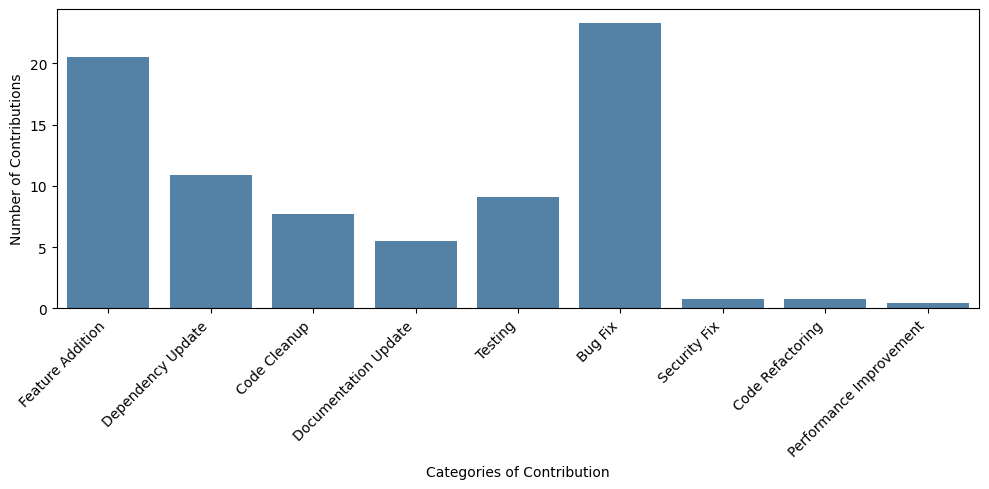

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(10, 5))
sns.barplot(data=contributions, ci=None, color='steelblue')

# Add labels and title
plt.xlabel('Categories of Contribution')
plt.ylabel('Number of Contributions')
#plt.title('Contributions by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [88]:
# Sum contributions across all categories for each company
contributions['Total_Contributions'] = contributions.iloc[:, 1:].sum(axis=1)

# Sort the companies based on their total contributions
top_10_companies = contributions.sort_values(by='Total_Contributions', ascending=False).head(10)

# Check if 'Ubuntu' and 'Canonical' are present in the top 10 companies
if 'Ubuntu' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Ubuntu'
    top_10_companies.at[idx, 'Company'] = 'Ubuntu'

if 'Canonical' not in top_10_companies['Company'].values:
    # Find the index of the company with the lowest contribution
    idx = top_10_companies['Total_Contributions'].idxmin()
    # Replace the company with the lowest contribution with 'Canonical'
    top_10_companies.at[idx, 'Company'] = 'Canonical'

# Display the top 10 companies
top_10_companies[['Company', 'Total_Contributions']]

,Company,Total_Contributions
19,Debian Official Contr.,1849.0
44,KALNISCHKIES,1509.0
90,Ubuntu Official Contr.,1462.0
9,CANONICAL,1391.0
38,Individual Contributor,1240.0
98,YUCOM,45.0
64,OSSYSTEMS,44.0
20,EDLUG,32.0
91,VOLLBIO,25.0
29,Canonical,13.0


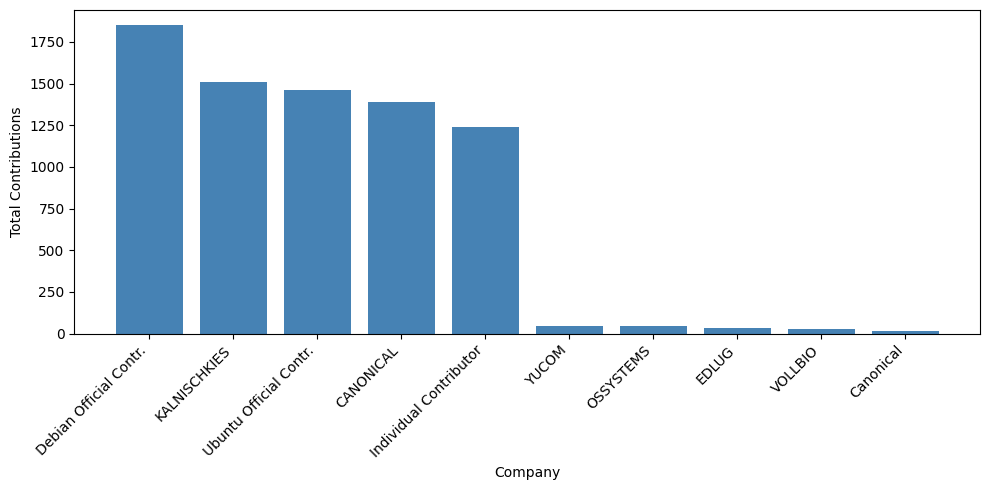

In [89]:
import matplotlib.pyplot as plt

# Plotting the top 10 companies with their total contributions
plt.figure(figsize=(10, 5))
plt.bar(top_10_companies['Company'], top_10_companies['Total_Contributions'], color='steelblue')
plt.xlabel('Company')
plt.ylabel('Total Contributions')
#plt.title('Top 10 Companies by # of Contributions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()